<a href="https://colab.research.google.com/github/surkovvv/TinkoffML_Fall2021/blob/main/Classification%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [55]:
#!wget  -O 'creditcard.csv' -q 'https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv?dl=0'

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [57]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [58]:
from sklearn.preprocessing import StandardScaler

df['normalizedAmount'] = StandardScaler().fit_transform(np.array(df['Amount']).reshape(-1, 1))
df = df.drop(['Time','Amount'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


Судя по кэгглу, у данных есть выбросы. Запомним, что они есть, и если будут результаты не очень, то просто удалим их.

In [59]:
X = df.drop('Class', axis=1)
y = df['Class']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [61]:
# Судя по описанию датасета, данные сильно несбалансированы (случаев фрода очень мало)
constant_prediction = np.zeros(y_test.shape[0])

In [62]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, plot_precision_recall_curve, plot_roc_curve

def report(y_pred, y_test, name):
    print("Report for {}".format(name))
    print("Accuracy : {}".format(accuracy_score(y_test, y_pred)))
    print("Precision : {}".format(precision_score(y_test, y_pred)))
    print("Recall : {}".format(recall_score(y_test, y_pred)))
    print("F1-score : {}".format(f1_score(y_test, y_pred)))
    print("AUC ROC : {}".format(roc_auc_score(y_test, y_pred)))

In [66]:
report(constant_prediction, y_test, "Constant prediction")

Report for Constant prediction
Accuracy : 0.9982795547909132
Precision : 0.0
Recall : 0.0
F1-score : 0.0
AUC ROC : 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
report(logreg_pred, y_test, "Logistic Regression")

Report for Logistic Regression
Accuracy : 0.9991222218320986
Precision : 0.8636363636363636
Recall : 0.5816326530612245
F1-score : 0.6951219512195121
AUC ROC : 0.7907371903460314


In [68]:
report(knn_pred, y_test, "KNN")

Report for KNN
Accuracy : 0.9995259997893332
Precision : 0.9382716049382716
Recall : 0.7755102040816326
F1-score : 0.8491620111731844
AUC ROC : 0.887711137493827


Как видно, лучший базовый алгоритм вышел у KNN : по всем метрикам он лучше логреса, и уж тем более лучше константного прогноза

In [69]:
def plot_curves(estimator):
    fig, axes = plt.subplots(1, 2)
    plot_roc_curve(estimator, X_test, y_test, ax=axes[0], name='ROC')
    plot_precision_recall_curve(estimator, X_test, y_test, ax=axes[1], name='PRC')
    fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


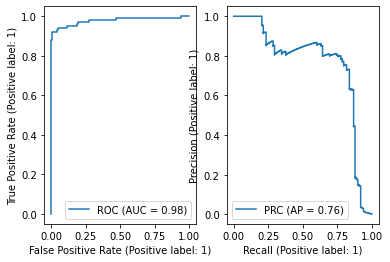

In [70]:
plot_curves(logreg)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


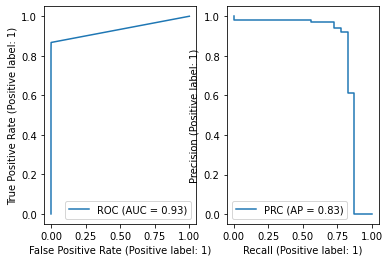

In [71]:
plot_curves(knn)

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

### (Осталось только понять, что банки делают с фродом, когда его детектят...) 

###Я посмотрел в интернете,и выяснилось, что при фроде есть стандартная операция - когда клиент пишет жалобу/письмо/заявку на возврат средств, из-за чего в конечном итоге страдает бизнес, а в наших моделях на элементарном уровне recall очень себе даже фиговенький, а значит его мы и будет максимизировать

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

In [72]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve

In [73]:
def kfold_score(X_train_cv, y_train_cv):
    folds = KFold(n_splits=5, shuffle=False)
    
    cs = np.logspace(-4, 2, num=7)
    mean_accuracies_l1 = []
    mean_accuracies_l2 = []
    indices = y_train_cv.index

    for c in cs:
        print("We're using lambda={} now".format(c))
        recall_accuracies_l2 = []
        recall_accuracies_l1 = []

        for train, test in folds.split(y_train_cv):
            logreg_l2 = LogisticRegression(C=c, penalty='l2')
            logreg_l2.fit(X_train_cv.loc[indices[train], :], y_train_cv[indices[train]])
            y_pred_l2 = logreg_l2.predict(X_train_cv.loc[indices[test], :])
            recall_acc_l2 = recall_score(y_train_cv[indices[test]], y_pred_l2)
            #print(recall_acc_l2)
            recall_accuracies_l2.append(recall_acc_l2)

            logreg_l1 = LogisticRegression(solver='liblinear', C=c, penalty='l1')
            logreg_l1.fit(X_train_cv.loc[indices[train], :], y_train_cv[indices[train]])
            y_pred_l1 = logreg_l1.predict(X_train_cv.loc[indices[test], :])
            recall_acc_l1 = recall_score(y_train_cv[indices[test]], y_pred_l1)
            #print(recall_acc_l1)
            recall_accuracies_l1.append(recall_acc_l1)

        recall_accuracies_l1 = np.array(recall_accuracies_l1)
        recall_accuracies_l1 = np.array(recall_accuracies_l1)
        recall_accuracies_l2 = np.array(recall_accuracies_l2)
        recall_accuracies_l2 = np.array(recall_accuracies_l2)

        mean_acc_l2 = recall_accuracies_l2.mean()
        mean_accuracies_l2.append(mean_acc_l2)
        print("Mean recall score with l2-regularization : {:.2f}".format(mean_acc_l2))

        mean_acc_l1 = recall_accuracies_l1.mean()
        mean_accuracies_l1.append(mean_acc_l1)
        print("Mean recall score with l1-regularization : {:.2f}".format(mean_acc_l1))

    mean_accuracies_l1 = np.array(mean_accuracies_l1)
    mean_accuracies_l2 = np.array(mean_accuracies_l2)
    best_cl1 = cs[np.argmax(mean_accuracies_l1)]
    best_cl2 = cs[np.argmax(mean_accuracies_l2)]
    print("Best lambda for Logistic Regression with l1 is {}".format(best_cl1))
    print("Best lambda for Logistic Regression with l2 is {}".format(best_cl2))
    
    fig, ax = plt.subplots(1, 2, figsize=(9, 6), sharey=True)
    plt.title("Mean recall scores")
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)
    ax1.plot(cs, mean_accuracies_l1, marker='o')
    ax1.title.set_text("l1 regularization")
    ax2.plot(cs, mean_accuracies_l2, marker='o')
    ax2.title.set_text("l2 regularization")
    plt.show()

    return best_cl1, best_cl2


### Ремарка : для всего датасета можно попробовать еще установить веса для ошибок(class_weight параметр в logreg)

We're using lambda=0.0001 now
Mean recall score with l2-regularization : 0.22
Mean recall score with l1-regularization : 0.00
We're using lambda=0.001 now
Mean recall score with l2-regularization : 0.52
Mean recall score with l1-regularization : 0.19
We're using lambda=0.01 now
Mean recall score with l2-regularization : 0.60
Mean recall score with l1-regularization : 0.56
We're using lambda=0.1 now
Mean recall score with l2-regularization : 0.61
Mean recall score with l1-regularization : 0.61
We're using lambda=1.0 now
Mean recall score with l2-regularization : 0.62
Mean recall score with l1-regularization : 0.62
We're using lambda=10.0 now
Mean recall score with l2-regularization : 0.62
Mean recall score with l1-regularization : 0.62
We're using lambda=100.0 now
Mean recall score with l2-regularization : 0.62
Mean recall score with l1-regularization : 0.62
Best lambda for Logistic Regression with l1 is 10.0
Best lambda for Logistic Regression with l2 is 1.0


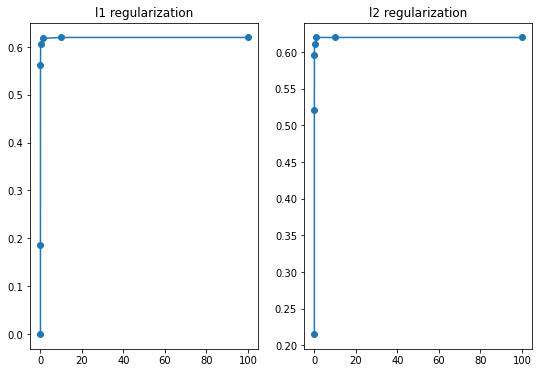

In [74]:
best_cl1_for_skew_data, best_cl2_for_skew_data = kfold_score(X_train, y_train)


In [75]:
def kfold_knn_score(X_cv, y_cv):
    folds = KFold(n_splits=5, shuffle=False)
    k_neighbours = [2, 3, 4, 5]
    mean_accuracies = []
    indices = y_cv.index

    for k_neig in k_neighbours:
        print("We're using {} neighbours".format(k_neig))
        recall_scores = []
        
        for train, test in folds.split(y_cv):
            model = KNeighborsClassifier(n_neighbors=k_neig)
            model.fit(X_cv.loc[indices[train], :], y_cv[indices[train]])
            y_pred = model.predict(X_cv.loc[indices[test], :]) 
            recall_scores.append(recall_score(y_cv[indices[test]], y_pred))
        recall_scores = np.array(recall_scores)
        mean_recall_score = recall_scores.mean()
        print("Mean recall score =", mean_recall_score)
        mean_accuracies.append(mean_recall_score)
    
    mean_accuracies = np.array(mean_accuracies)
    best_k_neig = k_neighbours[np.argmax(mean_accuracies)]
    fig = plt.figure(figsize=(9, 6))
    plt.title("Mean recall scores")
    plt.plot(k_neighbours, mean_accuracies, marker='o')
    plt.show()
    print("Best amount of neighbours is", best_k_neig)

    return best_k_neig

We're using 2 neighbours
Mean recall score = 0.71828173374613
We're using 3 neighbours
Mean recall score = 0.7555727554179567
We're using 4 neighbours
Mean recall score = 0.7264860681114551
We're using 5 neighbours
Mean recall score = 0.7479411764705883


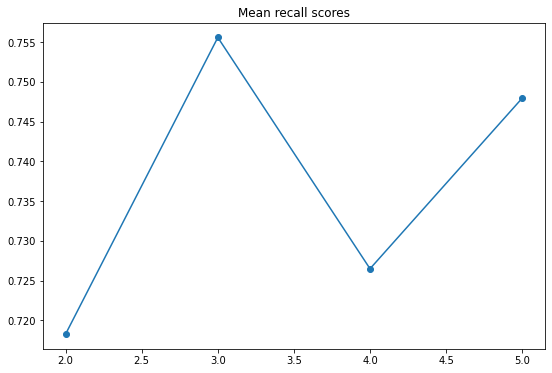

Best amount of neighbours is 3


In [76]:
best_k_neig_for_skew_data = kfold_knn_score(X_train, y_train)

### В ноутбуке по этому датасету я прочитал очень интересный способ работы с несбалансированными классами - undersampling(в нашем случае under, т.к. данных много)

In [77]:

fraud_index = y[(y == 1)].index
normal_index = y[(y == 0)].index

random_normal_index = np.random.choice(normal_index, size=fraud_index.shape[0], replace=False)


undersample_index = np.concatenate([random_normal_index, fraud_index.values])
X_undersample_train, X_undersample_test, y_undersampe_train, y_undersample_test = train_test_split(X.loc[undersample_index, :],
                                                                                                        y[undersample_index],
                                                                                                   random_state=42,
                                                                                                  train_size=0.7 
                                                                                                  )

We're using lambda=0.0001 now
Mean recall score with l2-regularization : 0.80
Mean recall score with l1-regularization : 0.00
We're using lambda=0.001 now
Mean recall score with l2-regularization : 0.83
Mean recall score with l1-regularization : 0.38
We're using lambda=0.01 now
Mean recall score with l2-regularization : 0.88
Mean recall score with l1-regularization : 0.96
We're using lambda=0.1 now
Mean recall score with l2-regularization : 0.90
Mean recall score with l1-regularization : 0.90
We're using lambda=1.0 now
Mean recall score with l2-regularization : 0.92
Mean recall score with l1-regularization : 0.92
We're using lambda=10.0 now


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Mean recall score with l2-regularization : 0.92
Mean recall score with l1-regularization : 0.92
We're using lambda=100.0 now


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Mean recall score with l2-regularization : 0.92
Mean recall score with l1-regularization : 0.93
Best lambda for Logistic Regression with l1 is 0.01
Best lambda for Logistic Regression with l2 is 100.0


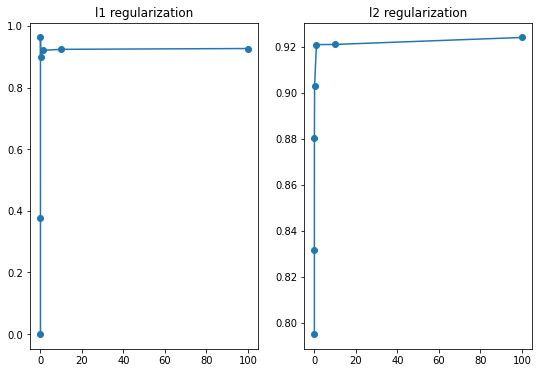

In [78]:
best_cl1, best_cl2 = kfold_score(X_undersample_train, y_undersampe_train)

We're using 2 neighbours
Mean recall score = 0.8778199716951111
We're using 3 neighbours
Mean recall score = 0.9039024890677123
We're using 4 neighbours
Mean recall score = 0.8780683571893981
We're using 5 neighbours
Mean recall score = 0.8883275758823517


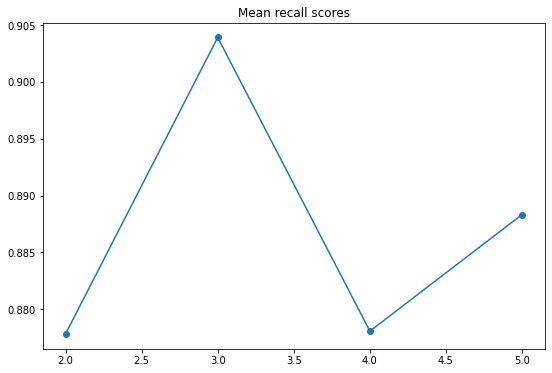

Best amount of neighbours is 3


In [79]:
best_k_neig = kfold_knn_score(X_undersample_train, y_undersampe_train)

### Посмотрим на результаты наших обученных моделей на undersamplied дате:

In [80]:
best_logreg_l1_undersample = LogisticRegression(solver='liblinear', C=best_cl1, penalty='l1')
best_logreg_l1_undersample.fit(X_undersample_train, y_undersampe_train)
y_pred_for_undersample_logreg = best_logreg_l1_undersample.predict(X_undersample_test)

In [81]:
report(y_pred_for_undersample_logreg, y_undersample_test, "Best Logistic Regression")

Report for Best Logistic Regression
Accuracy : 0.918918918918919
Precision : 0.9236111111111112
Recall : 0.910958904109589
F1-score : 0.9172413793103449
AUC ROC : 0.9188127853881277


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


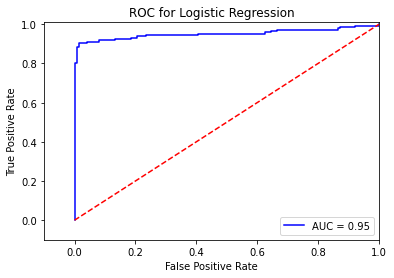

In [82]:
y_pred_undersample_score = best_logreg_l1_undersample.decision_function(X_undersample_test.values)

fpr, tpr, thresholds = roc_curve(y_undersample_test.values.ravel(), y_pred_undersample_score)
roc_auc = auc(fpr,tpr)


plt.title('ROC for Logistic Regression')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [83]:
best_knn_undersample = KNeighborsClassifier(n_neighbors=best_k_neig)
best_knn_undersample.fit(X_undersample_train, y_undersampe_train)
y_pred_for_undersample_knn = best_knn_undersample.predict(X_undersample_test)

In [84]:
report(y_pred_for_undersample_knn, y_undersample_test, "Best KNN")

Report for Best KNN
Accuracy : 0.9425675675675675
Precision : 0.9849624060150376
Recall : 0.8972602739726028
F1-score : 0.9390681003584228
AUC ROC : 0.9419634703196348


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


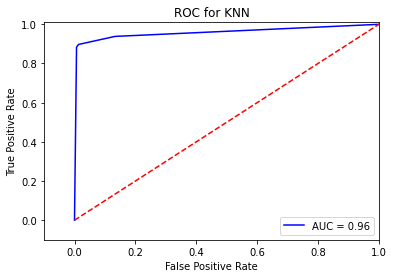

In [85]:
y_pred_undersample_score0 = best_knn_undersample.predict_proba(X_undersample_test.values)

fpr, tpr, thresholds = roc_curve(y_undersample_test.values.ravel(), y_pred_undersample_score0[:, 1])
roc_auc = auc(fpr,tpr)


plt.title('ROC for KNN')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Как видим, нам удалось хорошо улучшить полноту наших моделей (если так можно сказать) с помощью небольшой предобработки : отскейлили amount, убрали Date, а так же с помощью метода undersampling - он очень хорошо показал себя на дате с несбалансированными классами

# ____

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

## Взял датасет про белое вино с UCI, хотя он выглядит достаточно популярным, есть шанс, что ни с кем не пересечется... Оказывается, датасеты искать непросто - у кагглеров одни CV и NLP на уме..

Ссылка на датасет: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [86]:
data = pd.read_csv("winequality-white.csv", sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [87]:
data.shape

(4898, 12)

In [88]:
# посмотрим на количество пропусков в каждой из колонок: 
for col in data:
    print(col, " - ", data[col].isna().sum())

fixed acidity  -  0
volatile acidity  -  0
citric acid  -  0
residual sugar  -  0
chlorides  -  0
free sulfur dioxide  -  0
total sulfur dioxide  -  0
density  -  0
pH  -  0
sulphates  -  0
alcohol  -  0
quality  -  0


Прекрасно, пропусков нет, значит с самими данными особо возиться на надо будет (на сайте сказано, что все данные числового типа)

In [89]:
# Будем предсказыать quality вина - выделим соотвествующую колонку как таргет
y = data["quality"]
X = data.drop("quality", axis=1)

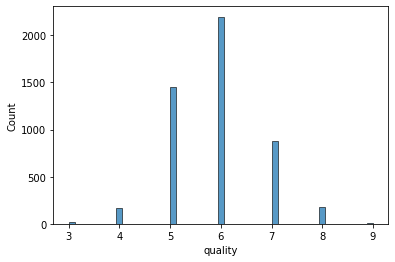

In [90]:
# Посмотрим на распределени классов :
sns.histplot(y)

Как видно, средних по качеству(пусть это будет диапазон от 5 до 7 включительно) вин больше всего, а вот плохих или хорошо заметно меньше (это можно подтянуть к имбалансу классов, например, использовать class_weight в LR)

In [91]:
# Нормализуем данные
X.loc[:, :] = StandardScaler().fit_transform(X)
X.sample(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2726,-1.842641,-0.776323,-0.199917,-0.550408,-0.447335,-0.782580,-1.114533,-0.417099,1.468577,0.088973,-0.580471
576,1.594265,-0.478657,-0.365197,-0.905330,0.056196,0.687541,1.144624,-0.243221,-0.385910,0.088973,-0.255399
2173,0.883181,0.414339,2.031350,2.042493,0.193523,0.452322,0.579835,1.963693,-0.253446,0.439499,-1.068080


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.75)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

In [93]:
# Обучим модельки просто на слегка обработанных данных :
logreg = LogisticRegression(multi_class='ovr', solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        32
           5       0.57      0.53      0.54       358
           6       0.50      0.77      0.61       544
           7       0.51      0.12      0.19       241
           8       0.00      0.00      0.00        43

    accuracy                           0.52      1225
   macro avg       0.26      0.23      0.22      1225
weighted avg       0.49      0.52      0.47      1225



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [96]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           3       0.50      0.14      0.22         7
           4       0.19      0.19      0.19        32
           5       0.51      0.57      0.54       358
           6       0.58      0.62      0.60       544
           7       0.61      0.47      0.53       241
           8       0.12      0.05      0.07        43

    accuracy                           0.55      1225
   macro avg       0.42      0.34      0.36      1225
weighted avg       0.54      0.55      0.54      1225



### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

### По поводу метрики : попробуем улучшить accuracy

В порядке эксперимента попробуем feature selection, на которое(ую/ый) авторы датасета намекают - посмотрим, как будут меняться результаты если мы выкинем по 1 столбцу :

In [97]:
for col in X:
    lr_fs = LogisticRegression(multi_class='ovr', solver='liblinear').fit(X_train.drop(col, axis=1), y_train)
    print("Without column '{}' accuracy is : {}".format(col, accuracy_score(y_test, lr_fs.predict(X_test.drop(col, axis=1)))))

Without column 'fixed acidity' accuracy is : 0.52
Without column 'volatile acidity' accuracy is : 0.5118367346938776
Without column 'citric acid' accuracy is : 0.5232653061224489
Without column 'residual sugar' accuracy is : 0.5208163265306123
Without column 'chlorides' accuracy is : 0.52
Without column 'free sulfur dioxide' accuracy is : 0.5224489795918368
Without column 'total sulfur dioxide' accuracy is : 0.5240816326530612
Without column 'density' accuracy is : 0.52
Without column 'pH' accuracy is : 0.5183673469387755
Without column 'sulphates' accuracy is : 0.52
Without column 'alcohol' accuracy is : 0.52


In [98]:
for col in X:
    knn_fs = KNeighborsClassifier().fit(X_train.drop(col, axis=1), y_train)
    print("Without column '{}' accuracy is : {}".format(col, accuracy_score(y_test, knn_fs.predict(X_test.drop(col, axis=1)))))

Without column 'fixed acidity' accuracy is : 0.5461224489795918
Without column 'volatile acidity' accuracy is : 0.5420408163265306
Without column 'citric acid' accuracy is : 0.5502040816326531
Without column 'residual sugar' accuracy is : 0.5330612244897959
Without column 'chlorides' accuracy is : 0.5453061224489796
Without column 'free sulfur dioxide' accuracy is : 0.5616326530612245
Without column 'total sulfur dioxide' accuracy is : 0.5453061224489796
Without column 'density' accuracy is : 0.5412244897959184
Without column 'pH' accuracy is : 0.5428571428571428
Without column 'sulphates' accuracy is : 0.5412244897959184
Without column 'alcohol' accuracy is : 0.5314285714285715


Штош... вау-эффекта не произошло в lr наша метрика вообще не улучшилась, для knn имеется улучшение на 1%, если выкинуть free sulfur dioxide

Попробуем сделать всё по честному - будем перебирать гиперпараметры для наших моделек

In [99]:
def hyperpharameters_for_lr():
    # что вообще будем перебирать ?
    # с учетом различных намеков по поводу feature selection, логичным будет перебирать лябмду для l1-регуляризации
    lambdas = np.logspace(-3, 2, num=5)
    folds = KFold(n_splits=5, shuffle=False)
    mean_accuracies1 = []
    mean_accuracies2 = []
    indices = y_train.index.values
    
    for lambda_ in lambdas:
        accuracies1 = []
        accuracies2 = []
        for train, test in folds.split(y_train):
            model1 = LogisticRegression(C=lambda_, multi_class='ovr', 
                                       solver='liblinear', penalty='l1', random_state=42, max_iter=1000)
            model2 = LogisticRegression(C=lambda_, multi_class='multinomial', 
                                       solver='saga', penalty='l1', random_state=42, max_iter=5000)  
            model1.fit(X_train.loc[indices[train], :], y_train[indices[train]])
            model2.fit(X_train.loc[indices[train], :], y_train[indices[train]])

            acc_score1 = accuracy_score(y_train[indices[test]], model1.predict(X_train.loc[indices[test], :]))
            acc_score2 = accuracy_score(y_train[indices[test]], model2.predict(X_train.loc[indices[test], :]))

            accuracies1.append(acc_score1)
            accuracies2.append(acc_score2)

        accuracies1 = np.array(accuracies1)
        accuracies2 = np.array(accuracies2)

        mean_accuracies1.append(accuracies1.mean())
        mean_accuracies2.append(accuracies2.mean())

    return mean_accuracies1, mean_accuracies2 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


best lambda for liblinear : 5.623413251903491
best lambda for sag : 0.31622776601683794


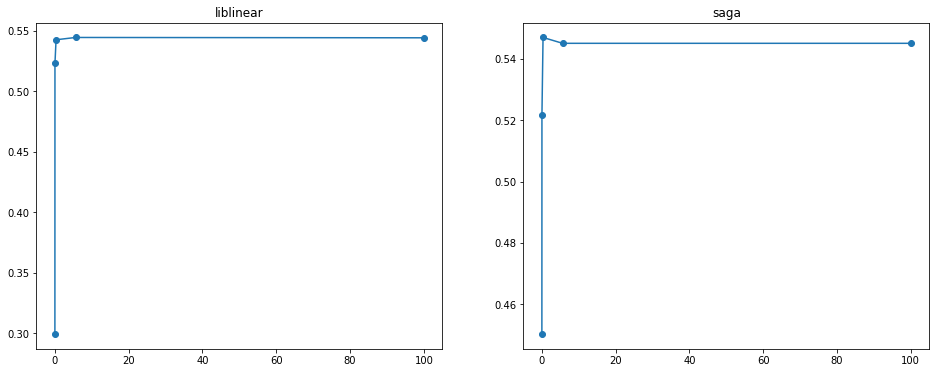

In [101]:
mean_accuracies1, mean_accuracies2 = hyperpharameters_for_lr()
mean_accuracies1 = np.array(mean_accuracies1)
mean_accuracies2 = np.array(mean_accuracies2)
lambdas = np.logspace(-3, 2, num=5)

print("best lambda for liblinear : {}".format(lambdas[np.argmax(mean_accuracies1)]))
print("best lambda for sag : {}".format(lambdas[np.argmax(mean_accuracies2)]))

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
plt.title("Mean accuracy scores")
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
ax1.plot(lambdas, mean_accuracies1, marker='o')
ax1.title.set_text("liblinear")
ax2.plot(lambdas, mean_accuracies2, marker='o')
ax2.title.set_text("saga")
plt.show()

In [102]:
best_lr_model = LogisticRegression(C=1, multi_class='ovr', penalty='l1', 
                                   solver='liblinear', max_iter=1000)
best_lr_model.fit(X_train, y_train)
print(classification_report(y_test, best_lr_model.predict(X_test)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        32
           5       0.57      0.53      0.54       358
           6       0.50      0.77      0.61       544
           7       0.54      0.12      0.19       241
           8       0.00      0.00      0.00        43

    accuracy                           0.52      1225
   macro avg       0.27      0.24      0.22      1225
weighted avg       0.49      0.52      0.47      1225



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
def hyperpharameters_for_knn():
    # что вообще будем перебирать ?
    # с учетом различных намеков по поводу feature selection, логичным будет перебирать лябмду для l1-регуляризации
    neighbours = np.arange(2, 8)
    folds = KFold(n_splits=5, shuffle=False)
    mean_accuracies = []
    indices = y_train.index.values
    
    for k in neighbours:
        accuracies = []

        for train, test in folds.split(y_train):
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(X_train.loc[indices[train], :], y_train[indices[train]])
            acc_score = accuracy_score(y_train[indices[test]], 
                                       model.predict(X_train.loc[indices[test], :]))

            accuracies.append(acc_score)

        accuracies = np.array(accuracies)
        mean_accuracies.append(accuracies.mean())

    return mean_accuracies 

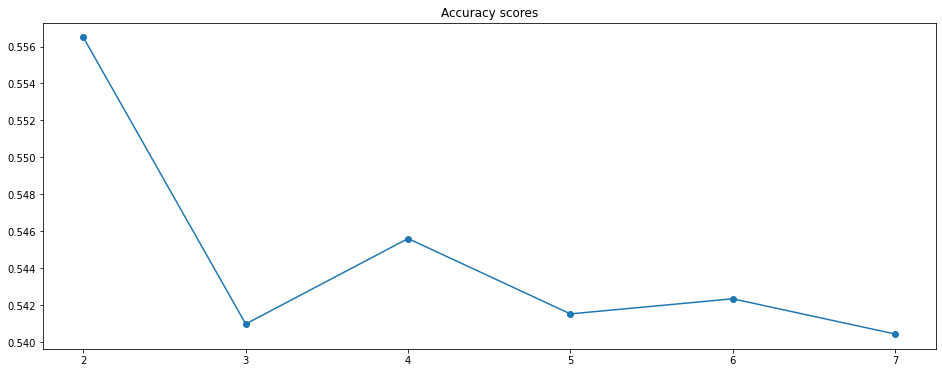

In [104]:
mean_accuracies = hyperpharameters_for_knn()
neighbours = np.arange(2, 8)

fig = plt.figure(figsize=(16, 6))
plt.title("Accuracy scores")
plt.plot(neighbours, mean_accuracies, marker='o')
plt.show()

In [105]:
mean_accuracies = np.array(mean_accuracies)
print("Best amount of neighbours :", neighbours[np.argmax(mean_accuracies)])

Best amount of neighbours : 2


In [106]:
best_knn_model = KNeighborsClassifier(n_neighbors=2)
best_knn_model.fit(X_train, y_train)
print(classification_report(y_test, best_knn_model.predict(X_test)))

              precision    recall  f1-score   support

           3       0.25      0.14      0.18         7
           4       0.22      0.47      0.30        32
           5       0.53      0.72      0.61       358
           6       0.61      0.56      0.59       544
           7       0.70      0.46      0.56       241
           8       0.86      0.14      0.24        43

    accuracy                           0.57      1225
   macro avg       0.53      0.42      0.41      1225
weighted avg       0.60      0.57      0.57      1225



### Судя по report'ам, модель логистической регрессии лучше себя показывать не стала (я старался...😰), зато подросла доля верных ответов для KNN - она же и будет лучшей моделью для этих данных (из двух рассмотренных)